# Seaborn - 빈도 그래프 2
데이터의 빈도를 표현하는 다른 방법

## #01. 기본 준비

### 패키지 참조

In [1]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
from pandas import read_excel
import seaborn as sb
import numpy as np

#### 그래프 전역 설정



In [2]:

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

### 데이터 준비하기
 타이타닉 탑승객 데이터
 

In [3]:
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")

df = titanic.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
                     "Cabin": "category", "Embarked": "category"})

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## #02. Countplot
데이터의 빈도를 표현하는 가장 간편한 방법

catplot()에서 kind값이 count로 고정되어 있는 형태추가한다

### 1. x축에 설정된 집단별 빈도수 확인

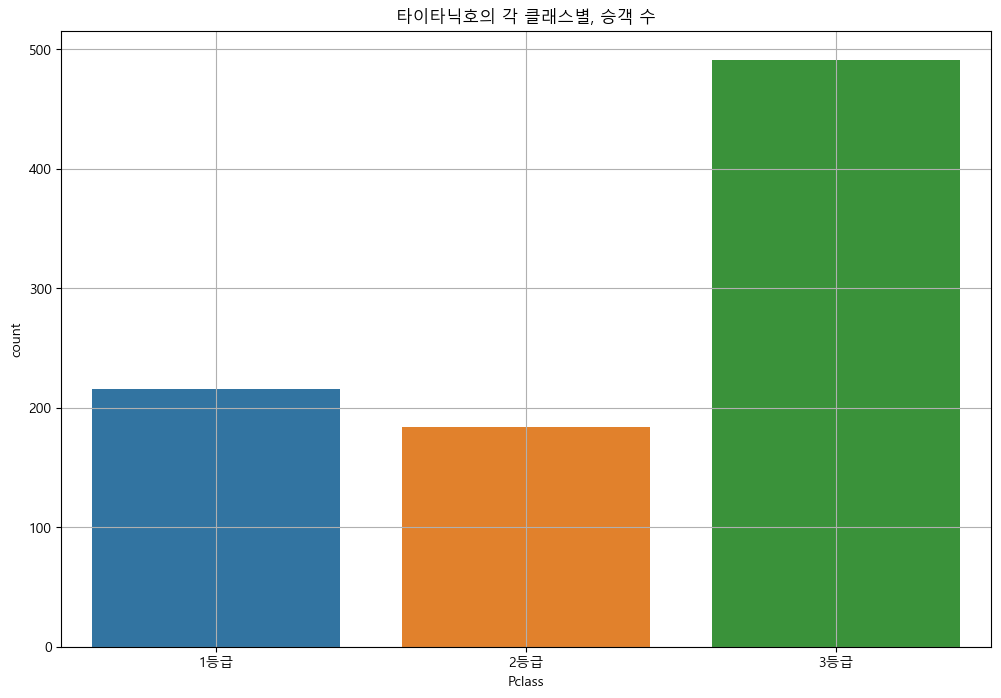

In [5]:
sb.countplot(data=df,x="Pclass")

plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()


### 2. 범주 추가



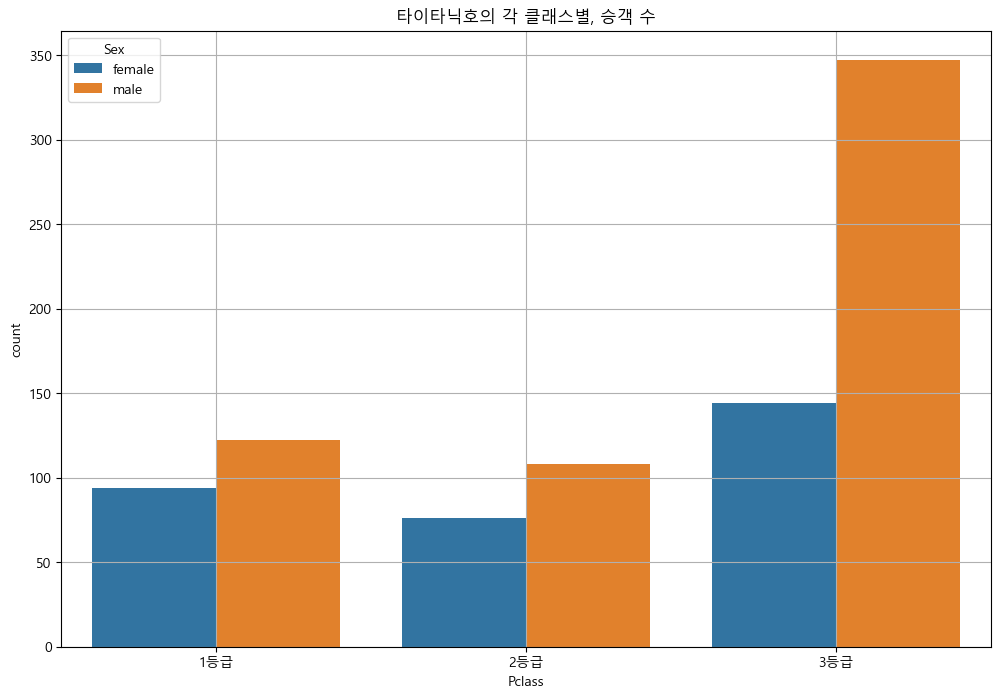

In [7]:
sb.countplot(data=df,x="Pclass",hue='Sex')
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()


## #03. 모자이크 그래프

막대그래프 외에도 변량이 모두 범주형인 다차원 데이터를 시각화할 때는 모자이크 그래프(mosaic plot)를 사용하기도 한다.

모자이크 그래프는 그룹 내의 데이터 백분율을 보여주는 누적 막대그래프이다.

모자이크 그래프는 변수가 3개 이상일 때도 사용할 수 있다.

모자이크 그래프는 statsmodels.graphics.mosaicplot 패키지의 mosaic 함수를 이용해서 그린다.

### 1. 한가지 변수에 대한 비율표시



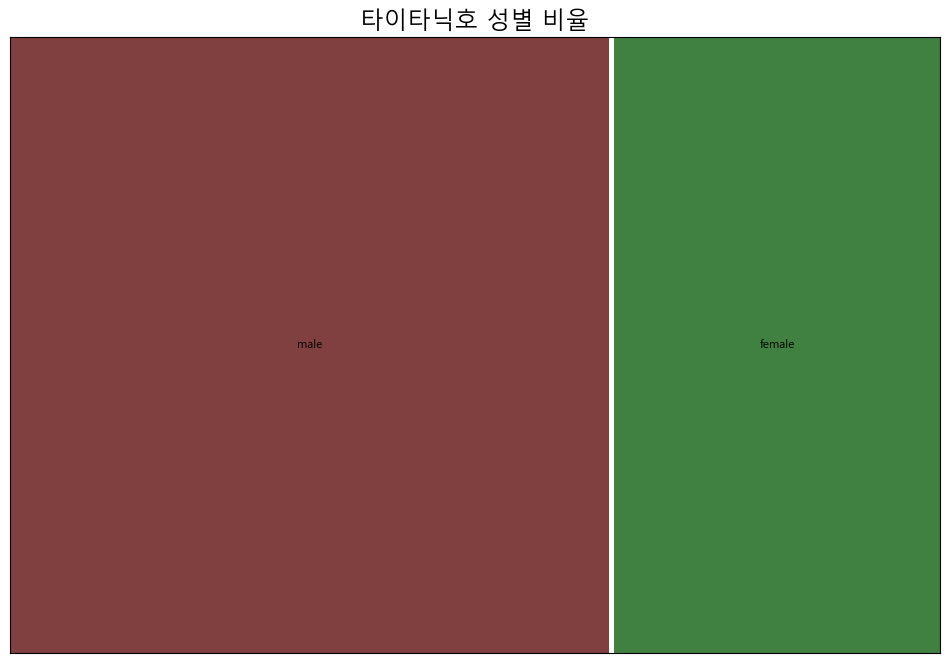

In [9]:
mosaic(df, ['Sex'], axes_label=False)

plt.title('타이타닉호 성별 비율', fontsize=17)
plt.show()
plt.close()

### 2. 두 개 이상 범주에 대한 비율 표시

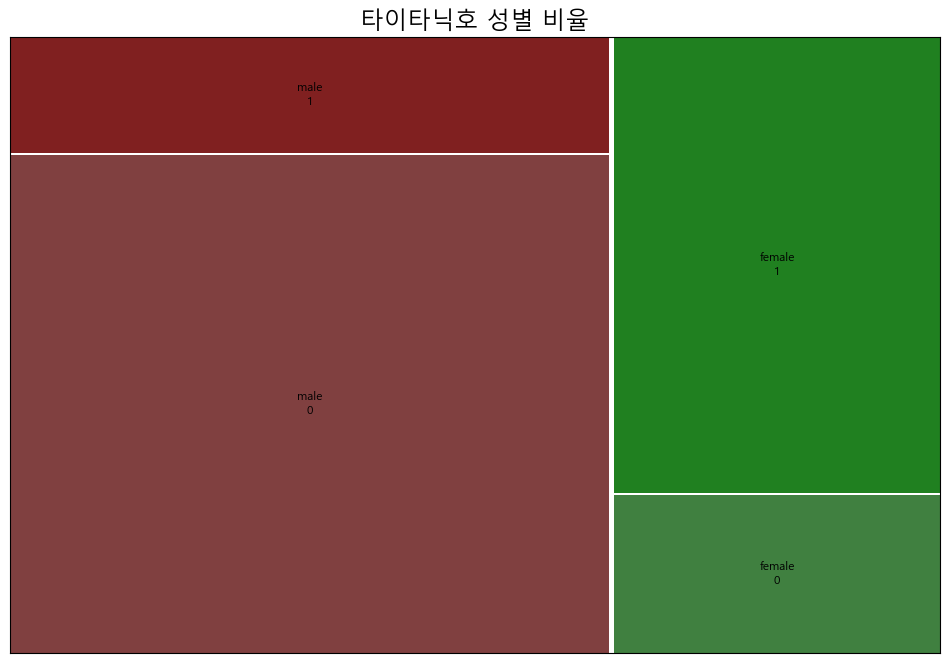

In [10]:
mosaic(df, ['Sex','Survived'], axes_label=False)

plt.title('타이타닉호 성별 비율', fontsize=17)
plt.show()
plt.close()

### 3. 색상과 표시 라벨 변경하기

In [12]:
def getColor(key):
    print(key)
    if '1' in key:
        color="teal"
    else :
        color="lightgray"
    return {"color":color}


In [13]:
def getLabel(key):
    if 'male' in key :
        sex="남자"
    else :
        sex="여자"
    if "0" in key :
        sur="사망"
    else :
        sur="생존"
    label = "%s%s" % (sex,sur)
    print(key, "=>",label)
    return label

('male', '0')
('male', '0') => 남자사망
('male', '1')
('male', '1') => 남자생존
('female', '0')
('female', '0') => 여자사망
('female', '1')
('female', '1') => 여자생존


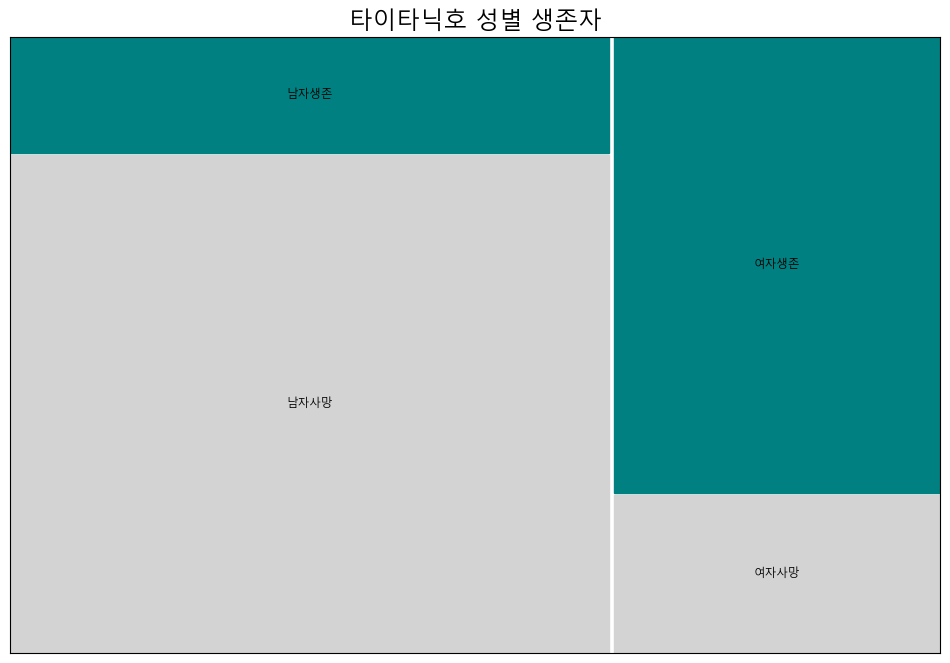

In [14]:
mosaic(df, ['Sex', 'Survived'], axes_label=False, 
       properties=getColor, labelizer=getLabel)

plt.title('타이타닉호 성별 생존자', fontsize=17)
plt.show()
plt.close()

### 람다식 사용

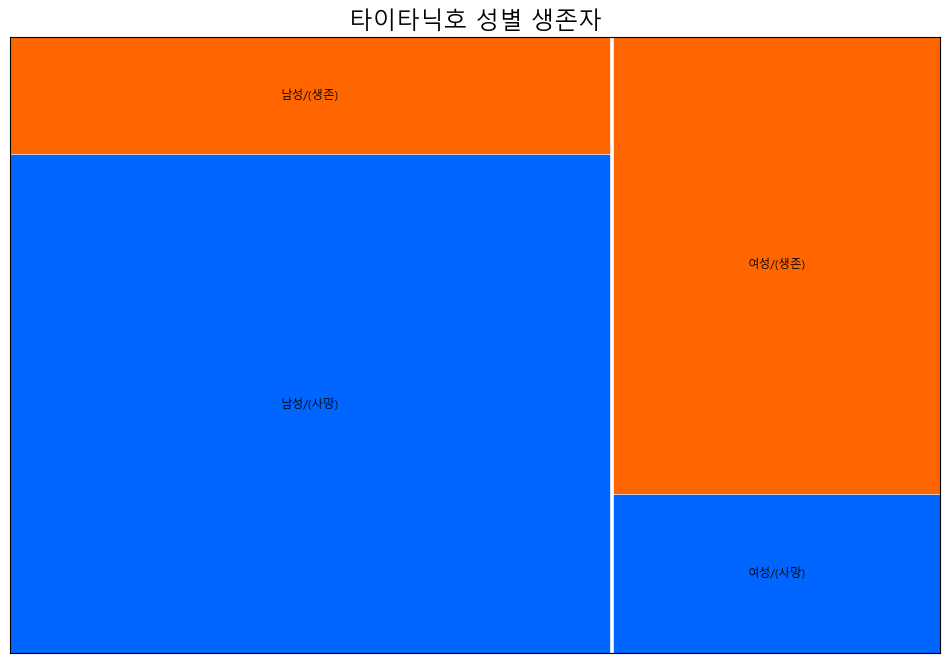

In [16]:
mosaic(df,['Sex','Survived'],axes_label=False,
        properties=lambda key: {"color":"#ff6600" if "1" in key else "#0066ff" },
        labelizer = lambda key : {('female','1'):'여성/(생존)',("female",'0'):"여성/(사망)",("male",'1'):'남성/(생존)',('male','0'):'남성/(사망)'} [key])
plt.title('타이타닉호 성별 생존자', fontsize=17)
plt.show()
plt.close()

## #04. 집단별 산점도 그래프

In [17]:
plt.rcParams["font.size"] = 16               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (20, 10)    # 그래프 사이즈 (가로,세로)inch

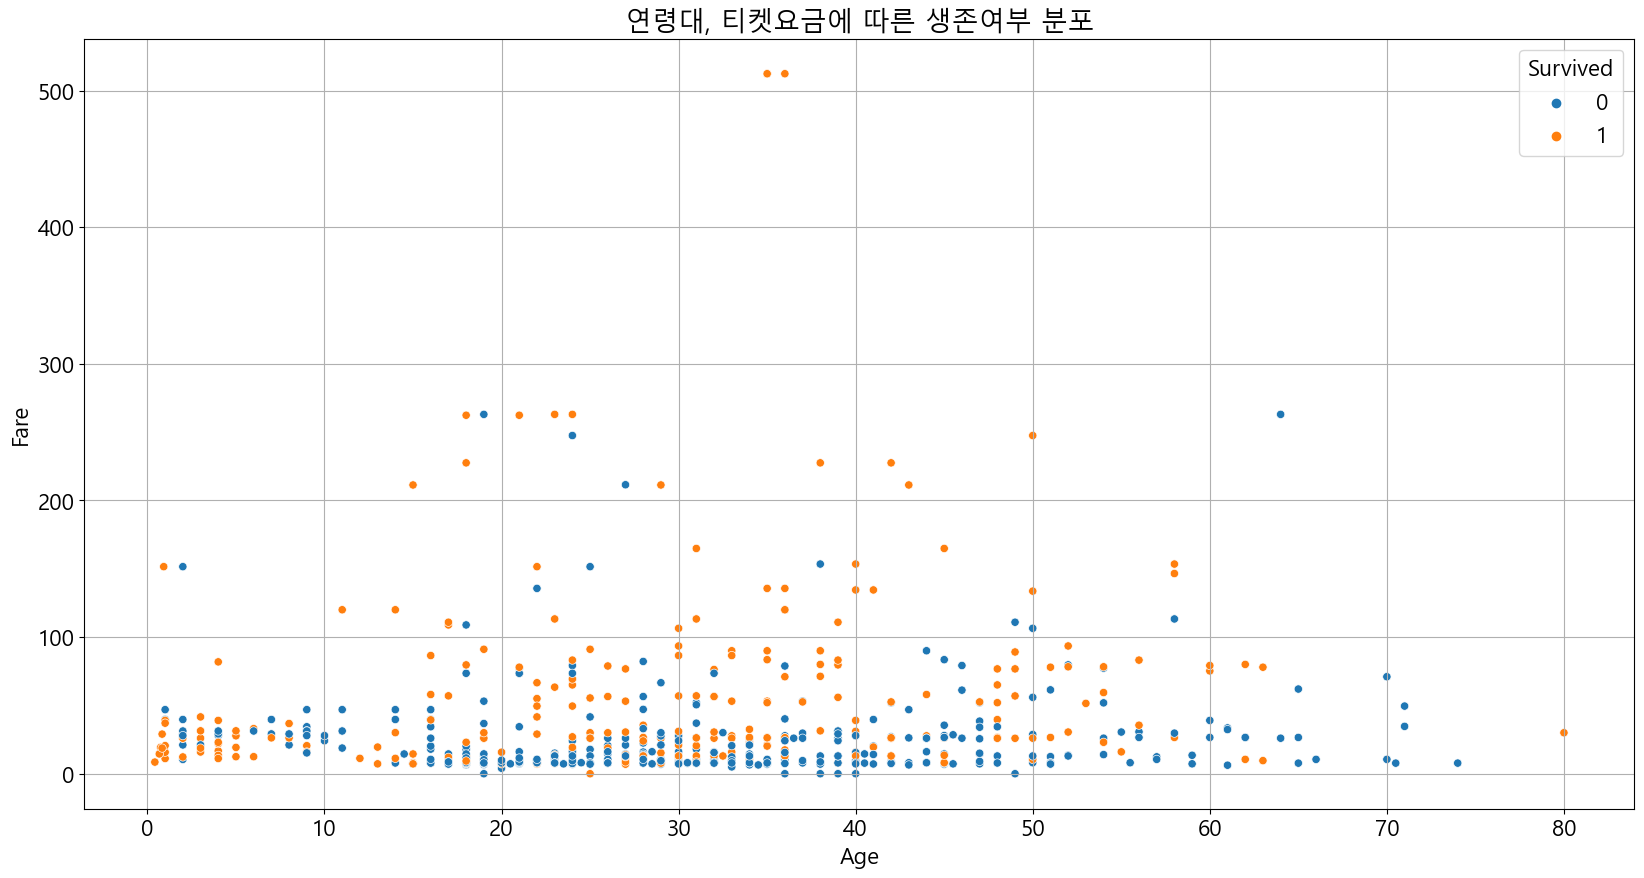

In [18]:
sb.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title("연령대, 티켓요금에 따른 생존여부 분포")
plt.grid()
plt.show()

## #05. 산점도 행렬
각 변수를 교차로 산점도 그래프를 나열한 형태

범주형 데이터는 자동으로 제외된다.

왼쪽 상단에서 오른쪽 하단으로의 중앙에는 각 데이터의 히스토그램이 표시된다.

diag_kind='kde' 파라미터를 추가하면 히스토그램 대신 커널밀도추정곡선을 표시한다.

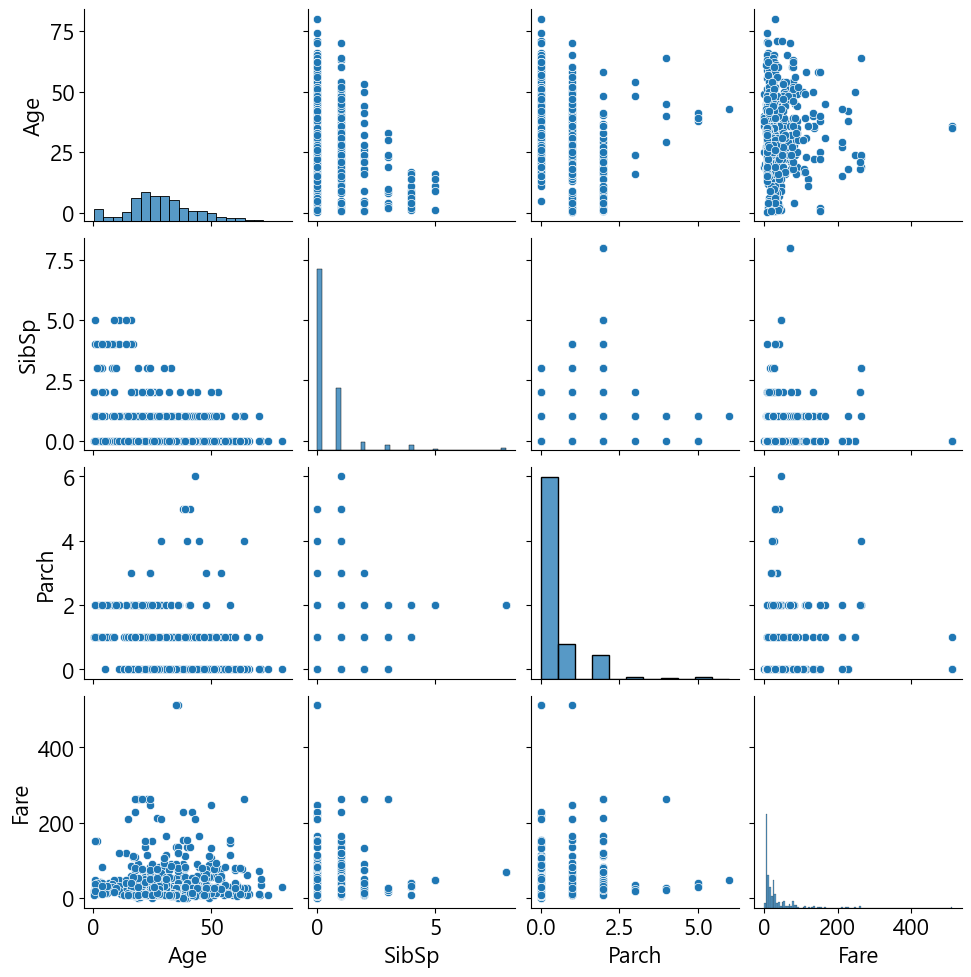

In [20]:
sb.pairplot(df)
plt.show()
plt.close()
